In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading data

In [50]:
df_full = pd.read_csv('heart_full.csv')
df_test = pd.read_csv('heart_4_test.csv')
df_train = pd.read_csv('heart_4_train.csv')
df = pd.read_csv('heart_4_train.csv')

# Analyze

### Analyzing numeric atributes

In [ ]:
numeric_cols = [
    'age', 'systolic_pressure', 'diastolic_pressure', 'daily_cigarettes',
    'cholesterol_level', 'heart_rate', 'mass_index',
    'blood_sugar_level', 'sleep_heart_rate', 'ldl_cholesterol'
]

numeric_data = df[numeric_cols].describe()
print(numeric_data)

for col in numeric_cols:
    plt.figure(figsize=(5, 3))
    df.boxplot(column=col)
    plt.title(f'Boxplot pentru {col}')
    plt.ylabel(col)
    plt.grid(False)
    plt.tight_layout()
    plt.show()

### Analyzing discret/ordinary atributes

In [ ]:
discret__ordinary_cols = [
    'gender', 'education_level', 'blood_pressure_medication',
    'smoking_status', 'hypertension_history', 'stroke_history',
    'diabetes_history', 'high_blood_sugar', 'chd_risk'
]

print(f"Number of example with no NaN values: {len(df[discret__ordinary_cols].dropna())}\n")

nunique_vals = df[discret__ordinary_cols].nunique()
print(f"Number of unique values:\n{nunique_vals}")

### Analyzing balance of classes

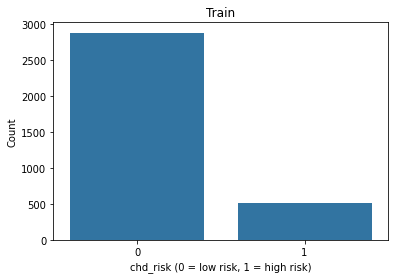

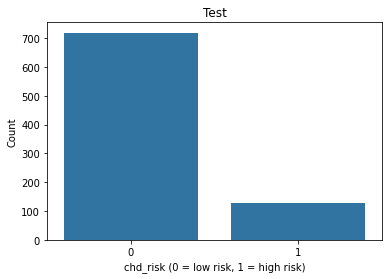

In [52]:
import seaborn as sns

sns.countplot(x='chd_risk', data=df_train)
plt.title('Train')
plt.xlabel('chd_risk (0 = low risk, 1 = high risk)')
plt.ylabel('Count')
plt.show()

sns.countplot(x='chd_risk', data=df_test)
plt.title('Test')
plt.xlabel('chd_risk (0 = low risk, 1 = high risk)')
plt.ylabel('Count')
plt.show()


### Analyzing corelation between atributes

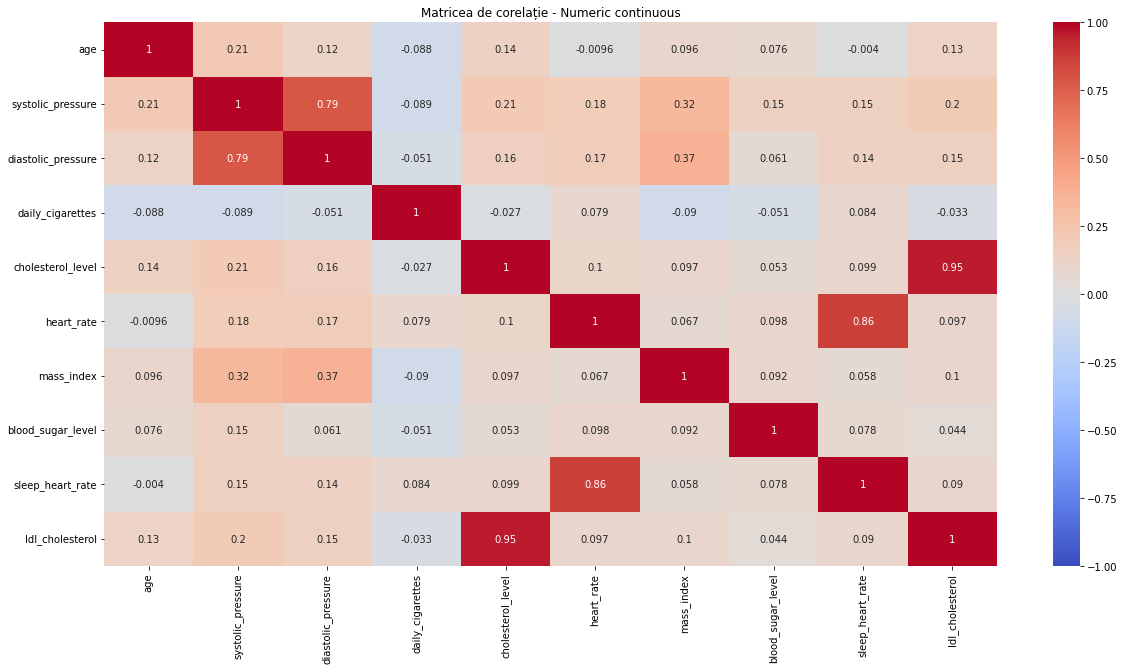

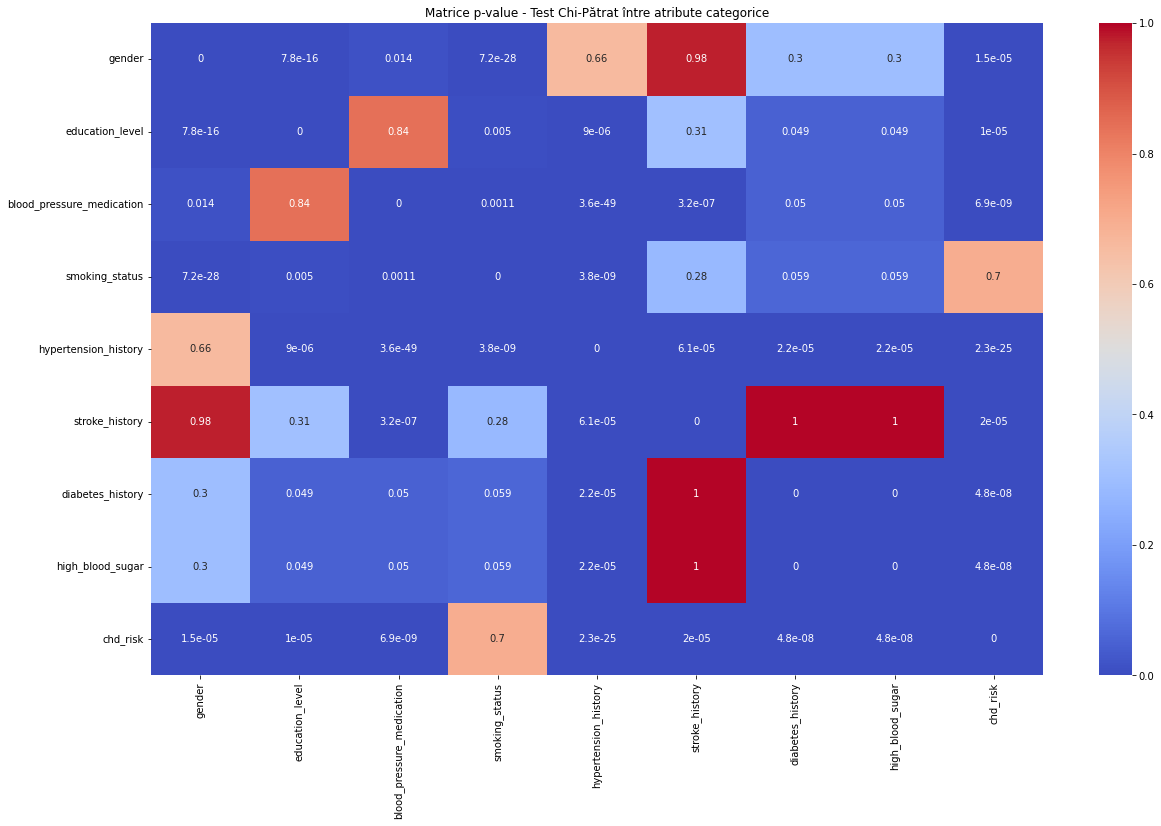

In [89]:
# Between numerical atributes
corr_matrix = df[numeric_cols].corr()
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matricea de corelație - Numeric continuous')
plt.xticks(rotation=90)
plt.show()

# Between categorical atributes
from scipy.stats import chi2_contingency
categorical_cols = [
    'gender', 'education_level', 'blood_pressure_medication',
    'smoking_status', 'hypertension_history', 'stroke_history',
    'diabetes_history', 'high_blood_sugar', 'chd_risk'
]

# Creează o matrice pătrată cu NaN inițial
pval_matrix = pd.DataFrame(np.ones((len(categorical_cols), len(categorical_cols))),
                          index=categorical_cols, columns=categorical_cols)

for i in range(len(categorical_cols)):
    for j in range(i+1, len(categorical_cols)):
        col1 = categorical_cols[i]
        col2 = categorical_cols[j]
        contingency_table = pd.crosstab(df[col1], df[col2])
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        pval_matrix.loc[col1, col2] = p
        pval_matrix.loc[col2, col1] = p

# Pe diagonală pune 0 (p=0, perfect corelate cu ele însele)
np.fill_diagonal(pval_matrix.values, 0)

plt.figure(figsize=(20, 12))
sns.heatmap(pval_matrix, annot=True, cmap='coolwarm', vmin=0, vmax=1)
plt.title('Matrice p-value - Test Chi-Pătrat între atribute categorice')
plt.show()